In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.data_loader import get_market_data, calculate_returns
from src.simulations import create_random_portfolio
from src.optimizer import generate_efficient_frontier, get_gmv_portfolio, get_max_sharpe_portfolio

In [2]:
tickers = ['AAPL', 'GOOG', 'AMZN', 'WMT', 'XOM', 'CVX']

prices = get_market_data(tickers)
returns = calculate_returns(prices)

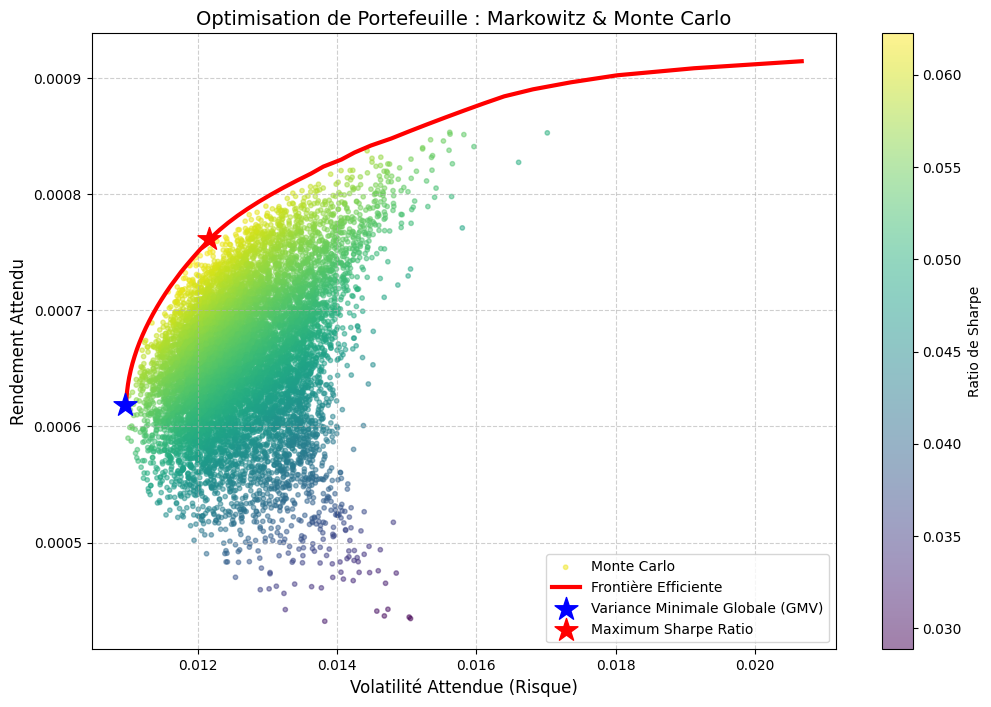

In [5]:
random_mu, random_sigma = create_random_portfolio(returns, n_portfolios=10000)

eff_mu, eff_sigma, gmv_mu, gmv_sigma = generate_efficient_frontier(returns,50)
ms_mu, ms_sigma = get_max_sharpe_portfolio(returns)

plt.figure(figsize=(12, 8))

random_sharpe = np.array(random_mu) / np.array(random_sigma)
plt.scatter(random_sigma, random_mu, c=random_sharpe, cmap='viridis', marker='o', s=10, alpha=0.5, label='Monte Carlo')
plt.colorbar(label='Ratio de Sharpe')

plt.plot(eff_sigma, eff_mu, 'r-', linewidth=3, label='Frontière Efficiente')

plt.scatter(gmv_sigma, gmv_mu, color='blue', marker='*', s=300, zorder=5, label='Variance Minimale Globale (GMV)')

plt.scatter(ms_sigma, ms_mu, color='red', marker='*', s=300, zorder=5, label='Maximum Sharpe Ratio')

plt.xlabel('Volatilité Attendue (Risque)', fontsize=12)
plt.ylabel('Rendement Attendu', fontsize=12)
plt.title('Optimisation de Portefeuille : Markowitz & Monte Carlo', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()